In [ ]:
! pip install tensorflow_hub first

In [5]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [7]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

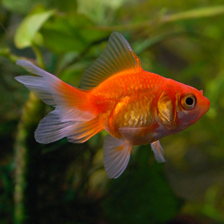

In [13]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [16]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [17]:
gold_fish

array([[[4.34222132e-06, 5.12623350e-06, 1.08555533e-06],
        [4.82469035e-06, 5.72931979e-06, 1.38709848e-06],
        [5.36746802e-06, 6.45302335e-06, 1.80925888e-06],
        ...,
        [5.06592487e-06, 6.03086294e-06, 6.03086294e-08],
        [4.94530761e-06, 5.91024568e-06, 6.03086294e-08],
        [4.76438172e-06, 5.66901116e-06, 0.00000000e+00]],

       [[4.40252995e-06, 5.12623350e-06, 1.26648122e-06],
        [5.00561624e-06, 5.84993705e-06, 1.68864162e-06],
        [5.42777665e-06, 6.51333198e-06, 1.99018477e-06],
        ...,
        [4.94530761e-06, 5.84993705e-06, 6.03086294e-08],
        [4.82469035e-06, 5.72931979e-06, 6.03086294e-08],
        [4.64376446e-06, 5.54839391e-06, 0.00000000e+00]],

       [[4.40252995e-06, 5.12623350e-06, 1.32678985e-06],
        [4.82469035e-06, 5.66901116e-06, 1.56802436e-06],
        [5.30715939e-06, 6.39271472e-06, 1.99018477e-06],
        ...,
        [4.88499898e-06, 5.78962842e-06, 6.03086294e-08],
        [4.76438172e-06, 5.66

In [18]:
#new axis
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [26]:
result=classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 0s 25ms/step


In [27]:
result

array([[-0.18002163, -0.40604085,  0.81904733, ..., -0.89533925,
        -1.0841292 ,  1.29135   ]], dtype=float32)

In [28]:
result.shape

(1, 1001)

In [29]:
predict_label_index=np.argmax(result)
predict_label_index

819

In [30]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [31]:
image_labels[predict_label_index]

'spotlight'

In [32]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 9s 0us/step


In [33]:
data_dir

'./datasets/flower_photos'

In [34]:
import pathlib
data_dir=pathlib.Path(data_dir)

In [35]:
data_dir

PosixPath('datasets/flower_photos')

In [36]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/17322195031_c2680809dc_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8687729737_a7fbeded2c_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18215579866_94b1732f24.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14053397367_75cba846eb_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17851831751_35b071f4b0.jpg')]

In [38]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [39]:
roses=list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4413509121_a62879598a.jpg'),
 PosixPath('datasets/flower_photos/roses/2491600761_7e9d6776e8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/17449165090_dfb27af360_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3654988152_b11178bbcb.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/527513005_41497ca4dc.jpg'),
 PosixPath('datasets/flower_photos/roses/4242976586_607a8f9843_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3315973481_850d2253e9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg

In [40]:
roses[0:5]

[PosixPath('datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4413509121_a62879598a.jpg'),
 PosixPath('datasets/flower_photos/roses/2491600761_7e9d6776e8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg')]

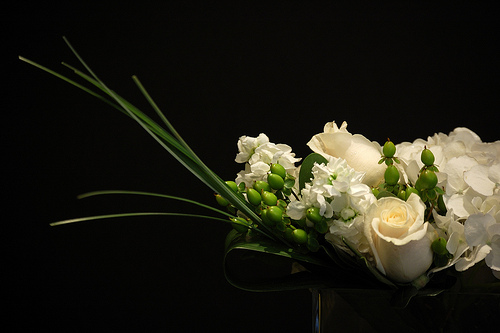

In [41]:
Image.open(str(roses[1]))

In [42]:
tulips=list(data_dir.glob('tulips/*'))
tulips

[PosixPath('datasets/flower_photos/tulips/13997627965_22d81601ce_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5813495998_64be1b8ab6_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5670916806_df4316006f_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4612075317_91eefff68c_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/251811158_75fa3034ff.jpg'),
 PosixPath('datasets/flower_photos/tulips/4522764992_e9d70b82c1_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/14266093711_66d18a1e44_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3430229687_32645b5738.jpg'),
 PosixPath('datasets/flower_photos/tulips/7166539842_43b7e02883.jpg'),
 PosixPath('datasets/flower_photos/tulips/3238068295_b2a7b17f48_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2434178332_7fcf85aa95_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/175686816_067a8cb4c5.jpg'),
 PosixPath('datasets/flower_photos/tulips/8768645961_8f1e097170_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8838347159_746d14

In [43]:
tulips[0:4]

[PosixPath('datasets/flower_photos/tulips/13997627965_22d81601ce_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5813495998_64be1b8ab6_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5670916806_df4316006f_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4612075317_91eefff68c_n.jpg')]

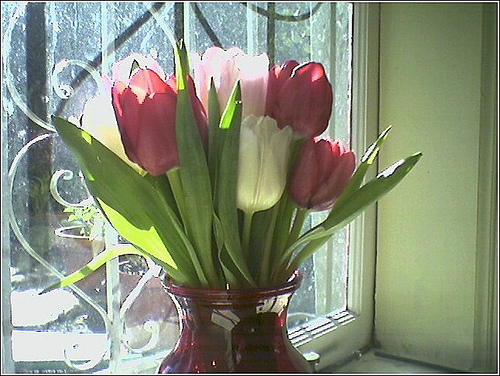

In [44]:
Image.open(str(tulips[4]))

In [45]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [48]:
flowers_images_dict['sunflowers']

[PosixPath('datasets/flower_photos/sunflowers/2706304885_4916102704_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7728953426_abd179ab63.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8174941335_56389b53e9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14814264272_4b39a102f9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14928117202_139d2142cc_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5951665793_8ae4807cbd_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5967284308_85714d8cf7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5994586159_1dd99d66b4_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9339697826_88c9c4dc50.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/310380634_60e6c79989.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15108515192_f686dce398_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5223643767_d8beb7e410.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5042785753_392cc4e74d_n.jpg'),
 Posi

In [46]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [49]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'

In [50]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [51]:
img.shape

(240, 240, 3)

In [52]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [53]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [54]:
X = np.array(X)
y = np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [56]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [57]:
X[0].shape

(224, 224, 3)

In [58]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

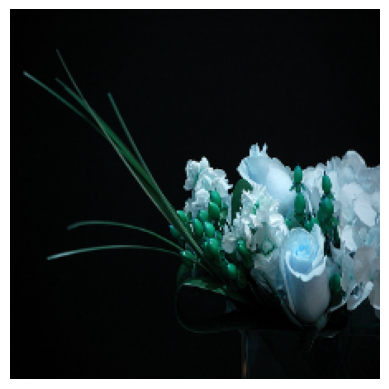

In [59]:
plt.axis('off')
plt.imshow(X[1])

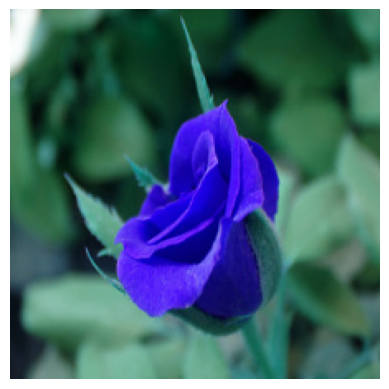

In [60]:
plt.axis('off')
plt.imshow(X[5])

In [63]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted

1/1 [==============================] - 0s 34ms/step


array([[ 0.18931589,  1.0998228 ,  1.2710496 , ..., -1.2938597 ,
        -2.0845356 ,  3.053278  ],
       [ 0.12151062, -0.10299076,  0.7381589 , ..., -0.9151906 ,
        -1.2586046 ,  4.656871  ],
       [ 0.21638754,  0.42000687,  1.8736078 , ..., -0.65792286,
        -0.854678  ,  0.991833  ]], dtype=float32)

In [64]:
predicted=np.argmax(predicted,axis=1)
predicted

array([722, 795, 795])

In [66]:
image_labels[795]

'shower curtain'

In [67]:
image_labels[880]

'umbrella'